<h1>SHRADDHA PADHIARI</h1>
<h4>--THE SPARKS FOUNDATION - DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP--</h4><br>
<h4>--TASK FOUR - EXPLORATORY DATA ANALYSIS-TERRORISM--</h4>

<h1>Import the libraries</h1>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
terr_data = pd.read_csv('/content/drive/MyDrive/Terror/globalterrorism.csv', encoding='ISO-8859-1')

terr_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Functions

In [ ]:
def format_spines(ax, right_border=True):  
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):   
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax, 
                           order=df[feature].value_counts().index)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax,
                           order=df[feature].value_counts().index)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_ticks([])

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Counting plot', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Counting plot by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
def region_analysis(region_name, data, palette, colors_plot2, color_lineplot):
    region = data.query('region_txt == @region_name')
    if len(region) == 0:
        print('Country did not exists in dataset')
        return 
    country_cities = region.groupby(by='country', as_index=False).count().sort_values('eventid', 
                                                                                   ascending=False).iloc[:5, :2]
    suicide_size = region['suicide'].sum() / len(region)
    labels = ['Suicide', 'Not Suicide']
    colors = colors_plot2
    
    country_year = region.groupby(by='iyear', as_index=False).sum().loc[:, ['iyear', 'nkill']]
    country_weapon = region.groupby(by='weaptype1_txt', as_index=False).count().sort_values(by='eventid',
                                                                                             ascending=False).iloc[:, 
                                                                                                                   :2]
    # Dashboard
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    
    # Plot 1 - Top 5 terrorism cities
    sns.barplot(x='eventid', y='country', data=country_cities, ci=None, palette=palette, ax=axs[0, 0])
    format_spines(axs[0, 0], right_border=False)
    axs[0, 0].set_title(f'Top 5 {region_name} Cities With Most Terrorism Occurences')
    axs[0, 0].set_ylabel('City')
    axs[0, 0].set_xlabel('Victims')
    
    # Plot 2 - Suicide Rate
    center_circle = plt.Circle((0,0), 0.75, color='white')
    axs[0, 1].pie((suicide_size, 1-suicide_size), labels=labels, colors=colors_plot2, autopct='%1.1f%%')
    axs[0, 1].add_artist(center_circle)
    format_spines(axs[0, 1], right_border=False)
    axs[0, 1].set_title(f'{region_name} Terrorism Suicide Rate')
    axs[0, 0].set_ylabel('Victims')
    
    # Plot 3 - Victims through the years
    sns.lineplot(x='iyear', y='nkill', data=country_year, ax=axs[1, 0], color=color_lineplot)
    format_spines(axs[1, 0], right_border=False)
    axs[1, 0].set_xlim([1970, 2017])
    axs[1, 0].set_title(f'{region_name} Number of Victims Over Time')
    axs[1, 0].set_ylabel('Victims')
    
    # Plot 4 - Terrorism Weapons
    sns.barplot(x='weaptype1_txt', y='eventid', data=country_weapon, ci=None, palette=palette, ax=axs[1, 1])
    axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
    axs[1, 1].set_xlabel('')
    axs[1, 1].set_ylabel('Count')
    format_spines(axs[1, 1], right_border=False)
    axs[1, 1].set_title(f'{region_name} Weapons Used in Attacks')
    
    plt.suptitle(f'Terrorism Analysis in {region_name} between 1970 and 2017', size=16)    
    plt.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

Changing the large string describing the "Vehicle" in `weaptype1_txt` attribute.

In [ ]:
terr_data['weaptype1_txt'] = terr_data['weaptype1_txt'].apply(lambda x: x.split()[0] if 'Vehicle' in x.split() else x)

# Plots




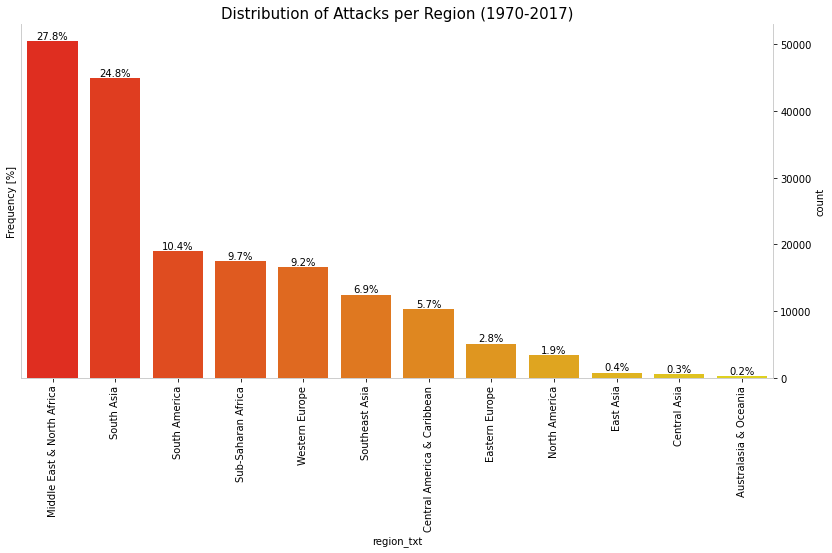

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
count_plot('region_txt', terr_data, ax=ax, colors='autumn')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title('Distribution of Attacks per Region (1970-2017)', size=15)
plt.show()

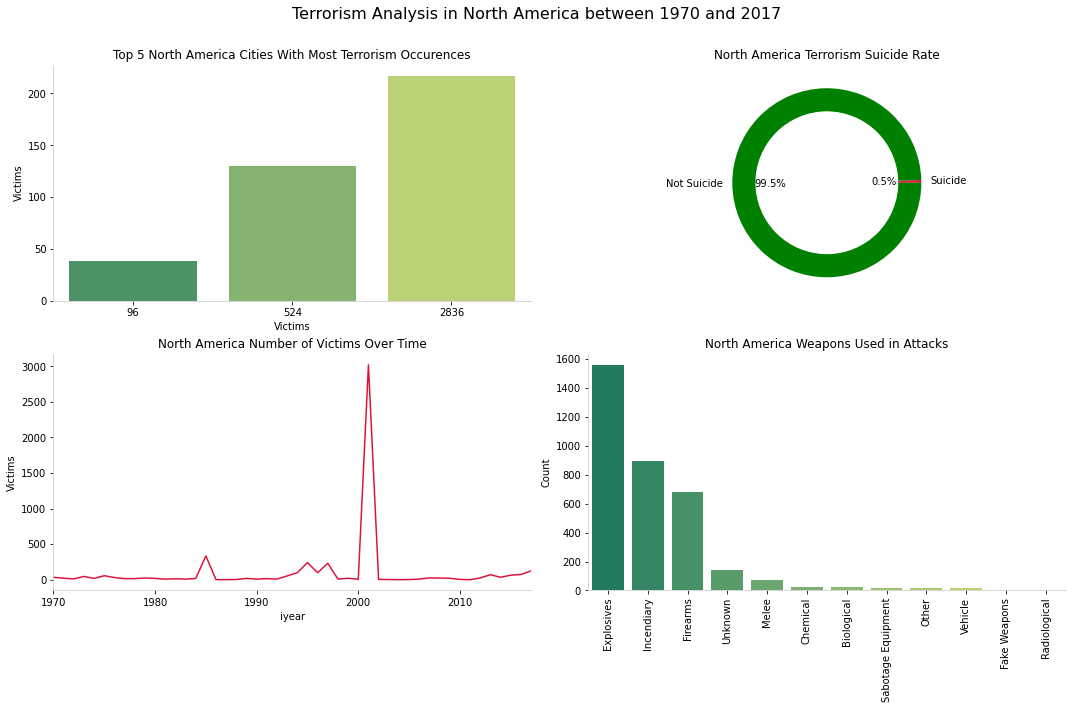

In [ ]:
region_analysis(region_name='North America', data=terr_data, palette='summer', 
                 colors_plot2=['crimson', 'green'], color_lineplot='crimson')

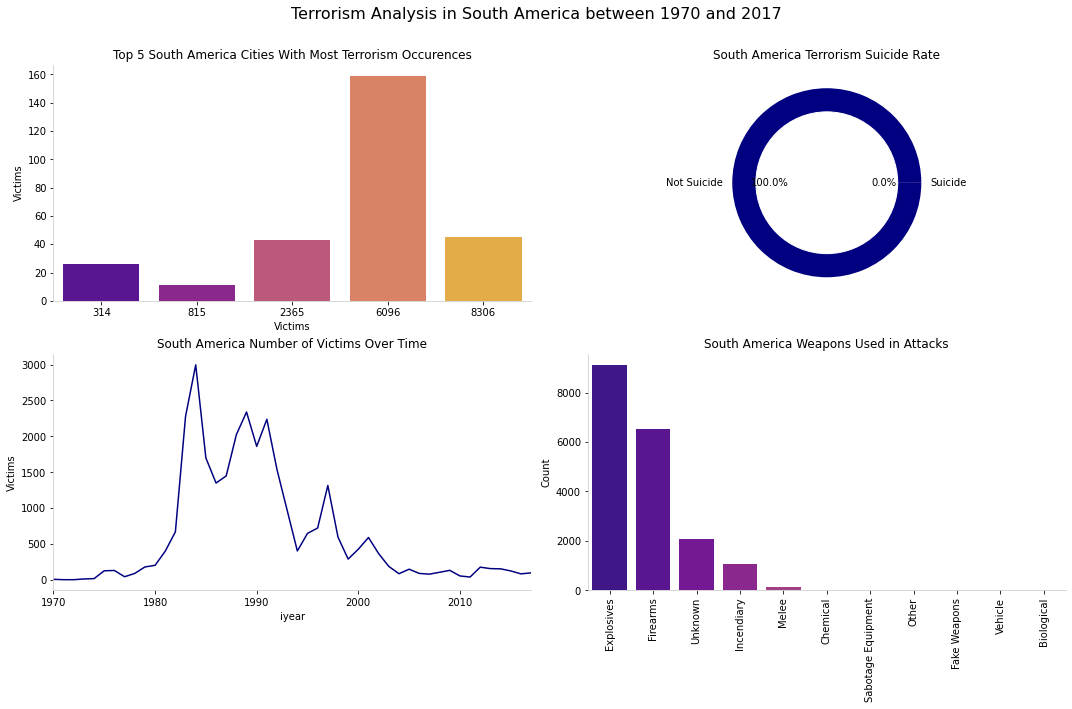

In [ ]:
region_analysis(region_name='South America', data=terr_data, palette='plasma', 
                 colors_plot2=['crimson', 'navy'], color_lineplot='navy')

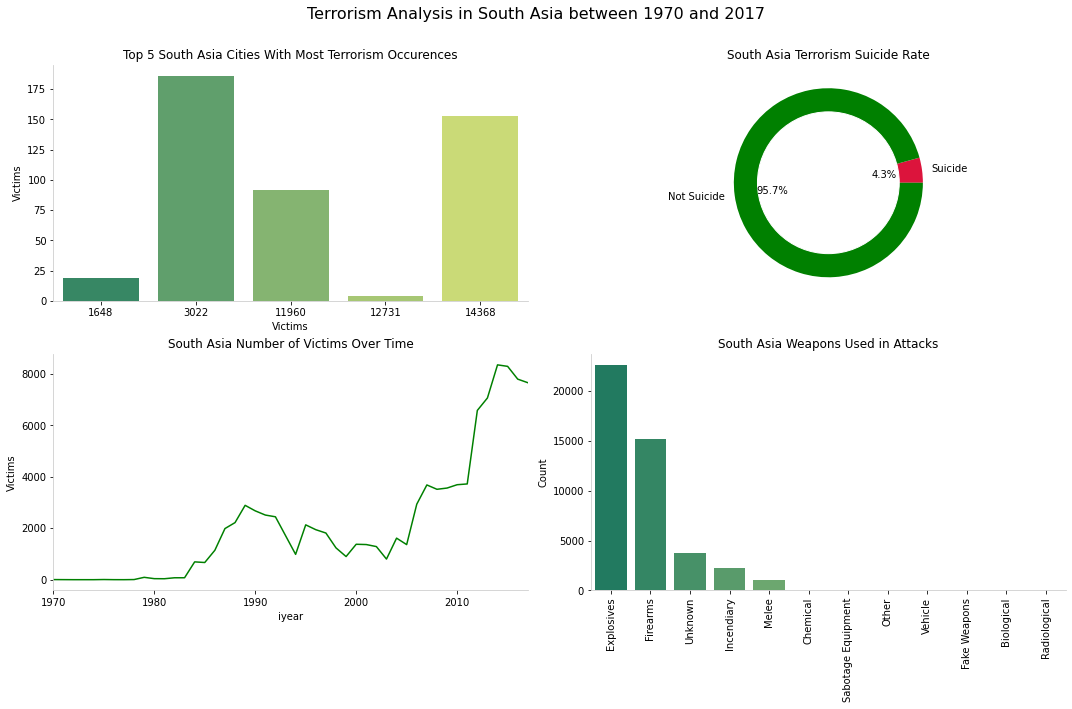

In [ ]:
region_analysis(region_name='South Asia', data=terr_data, palette='summer', 
                 colors_plot2=['crimson', 'green'], color_lineplot='green')

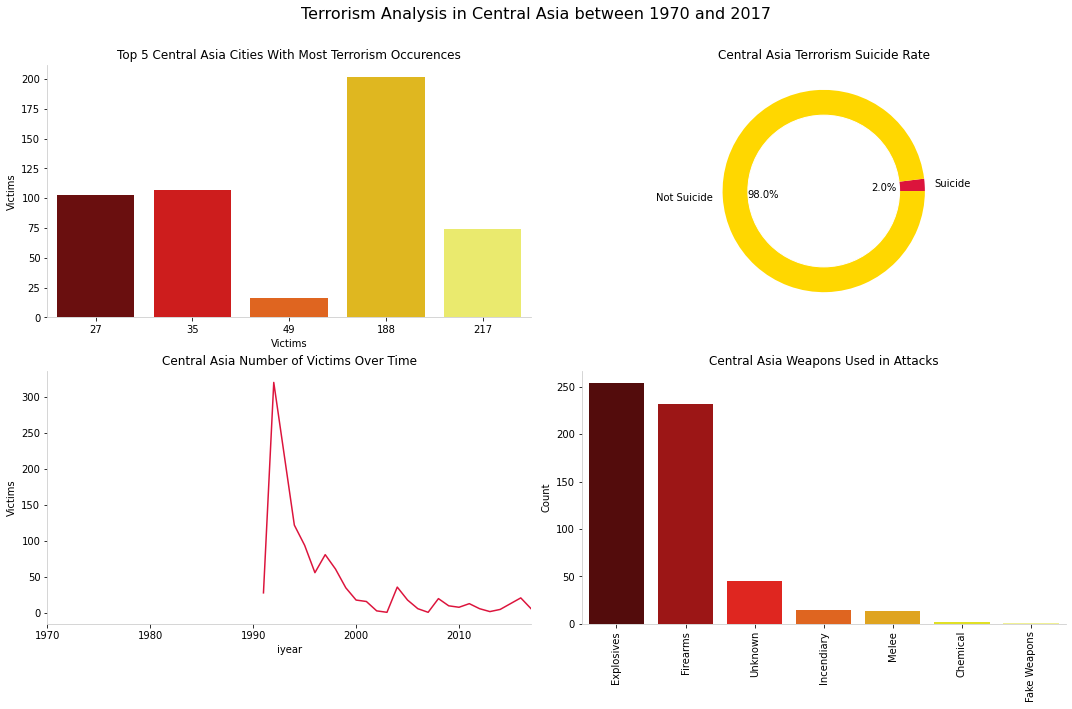

In [ ]:
region_analysis(region_name='Central Asia', data=terr_data, palette='hot', 
                 colors_plot2=['crimson', 'gold'], color_lineplot='crimson')

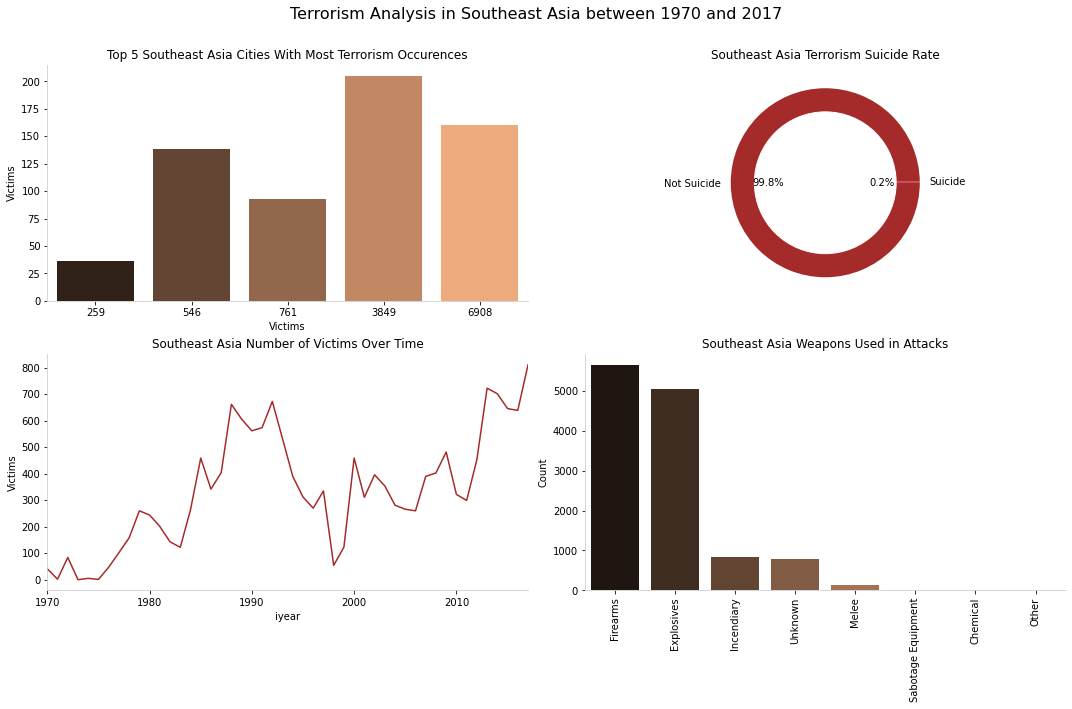

In [ ]:
region_analysis(region_name='Southeast Asia', data=terr_data, palette='copper', 
                 colors_plot2=['crimson', 'brown'], color_lineplot='brown')

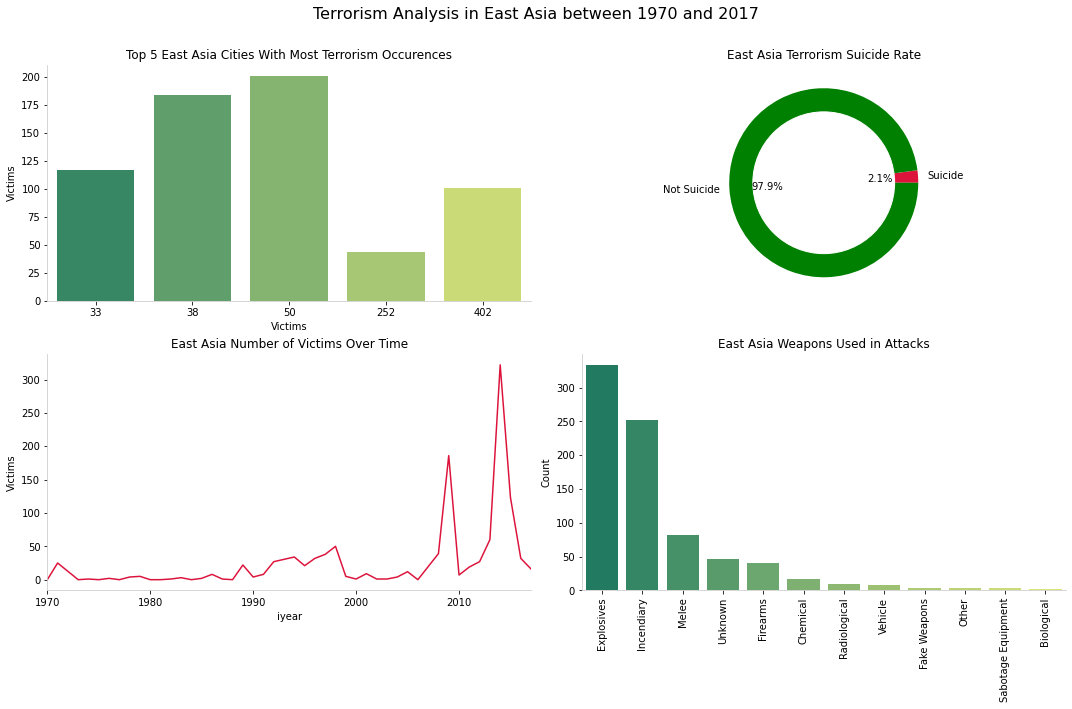

In [ ]:
region_analysis(region_name='East Asia', data=terr_data, palette='summer', 
                 colors_plot2=['crimson', 'green'], color_lineplot='crimson')

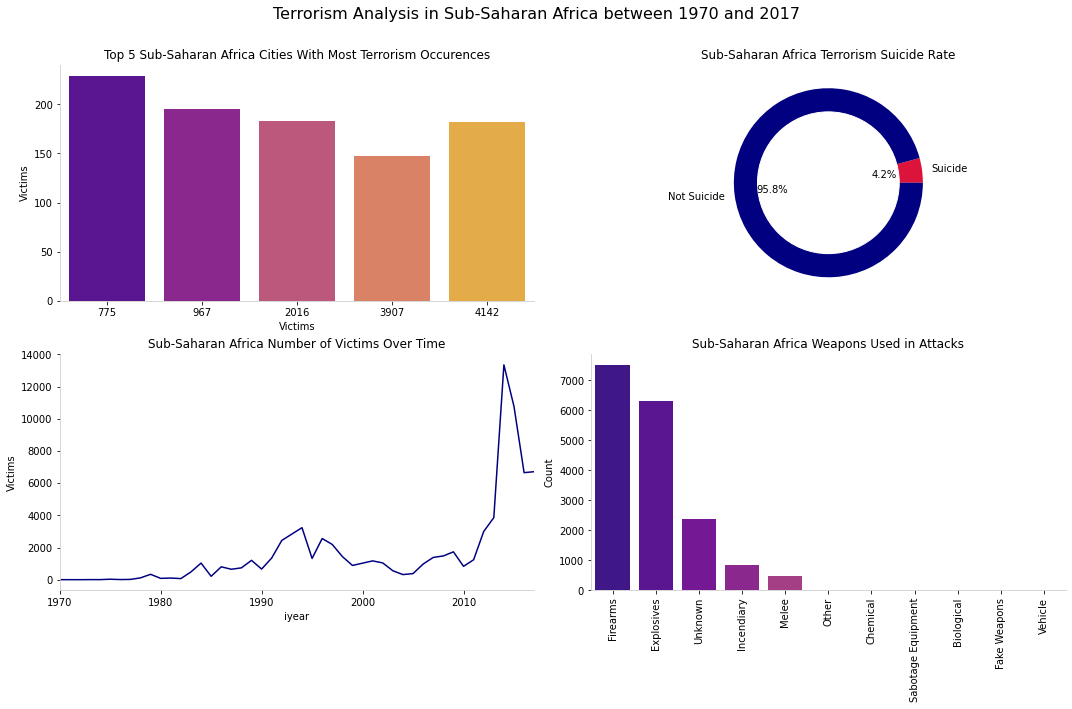

In [ ]:
region_analysis(region_name='Sub-Saharan Africa', data=terr_data, palette='plasma', 
                 colors_plot2=['crimson', 'navy'], color_lineplot='navy')

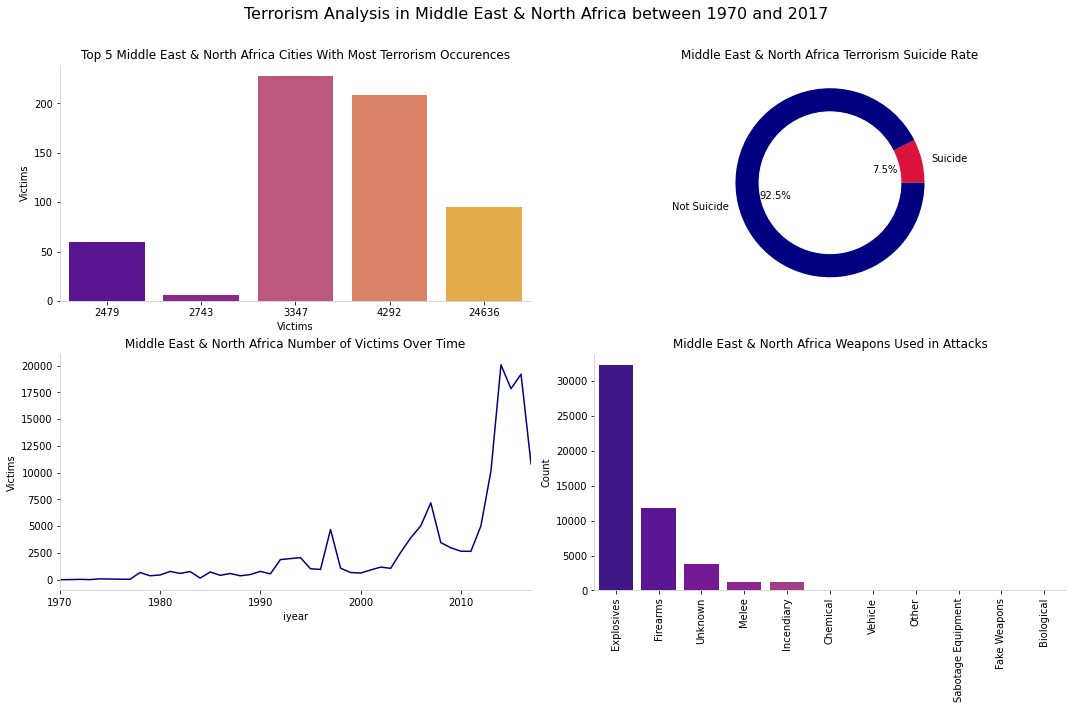

In [ ]:
region_analysis(region_name='Middle East & North Africa', data=terr_data, palette='plasma', 
                 colors_plot2=['crimson', 'navy'], color_lineplot='navy')

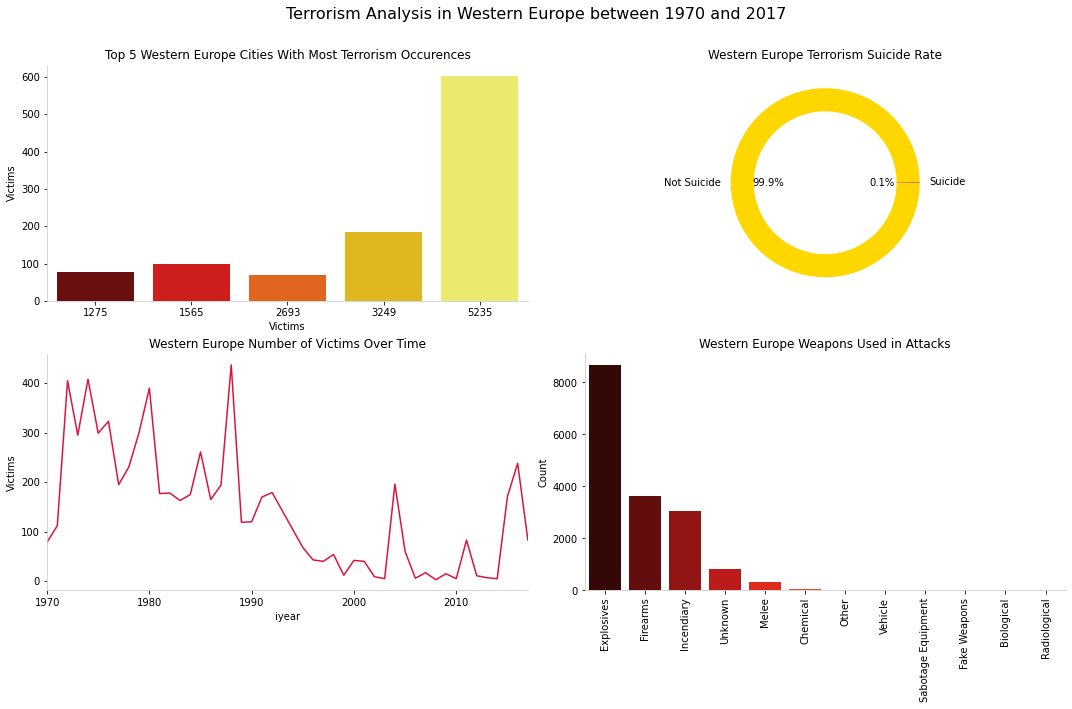

In [ ]:
region_analysis(region_name='Western Europe', data=terr_data, palette='hot', 
                 colors_plot2=['crimson', 'gold'], color_lineplot='crimson')

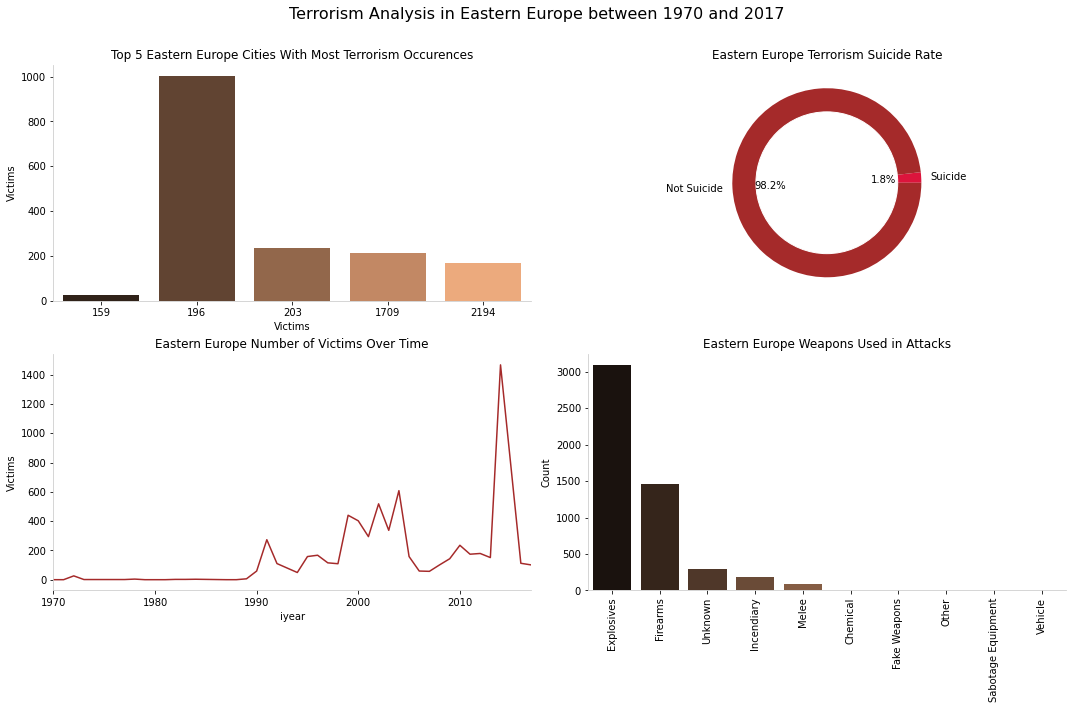

In [ ]:
region_analysis(region_name='Eastern Europe', data=terr_data, palette='copper', 
                 colors_plot2=['crimson', 'brown'], color_lineplot='brown')

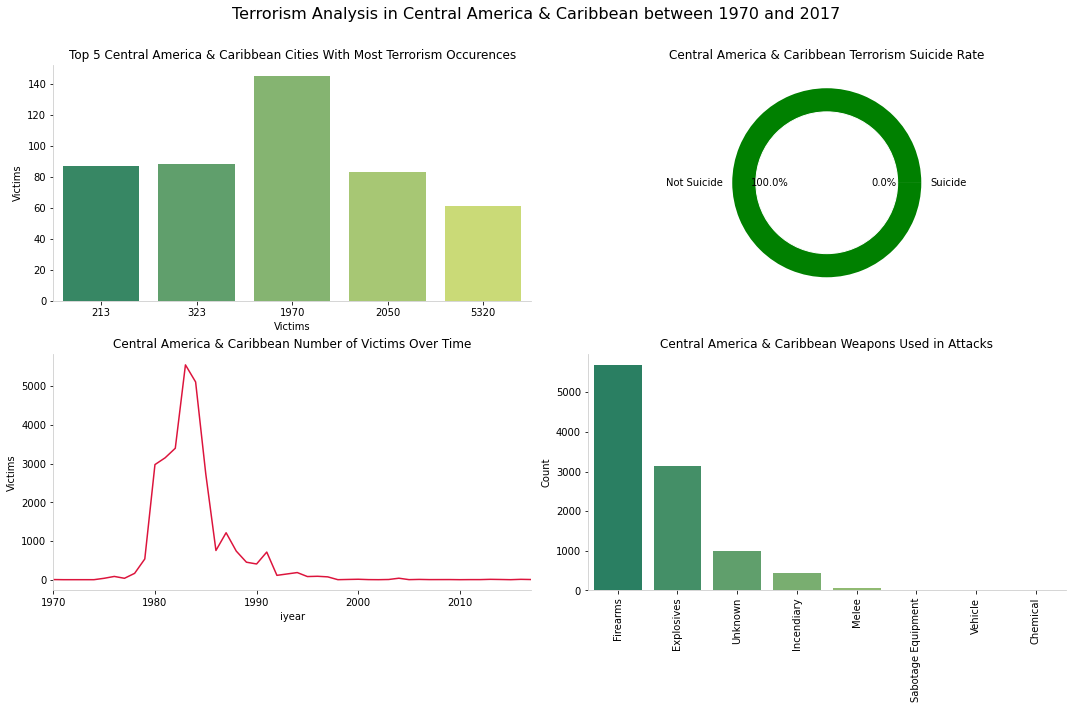

In [ ]:
region_analysis(region_name='Central America & Caribbean', data=terr_data, palette='summer', 
                 colors_plot2=['crimson', 'green'], color_lineplot='crimson')

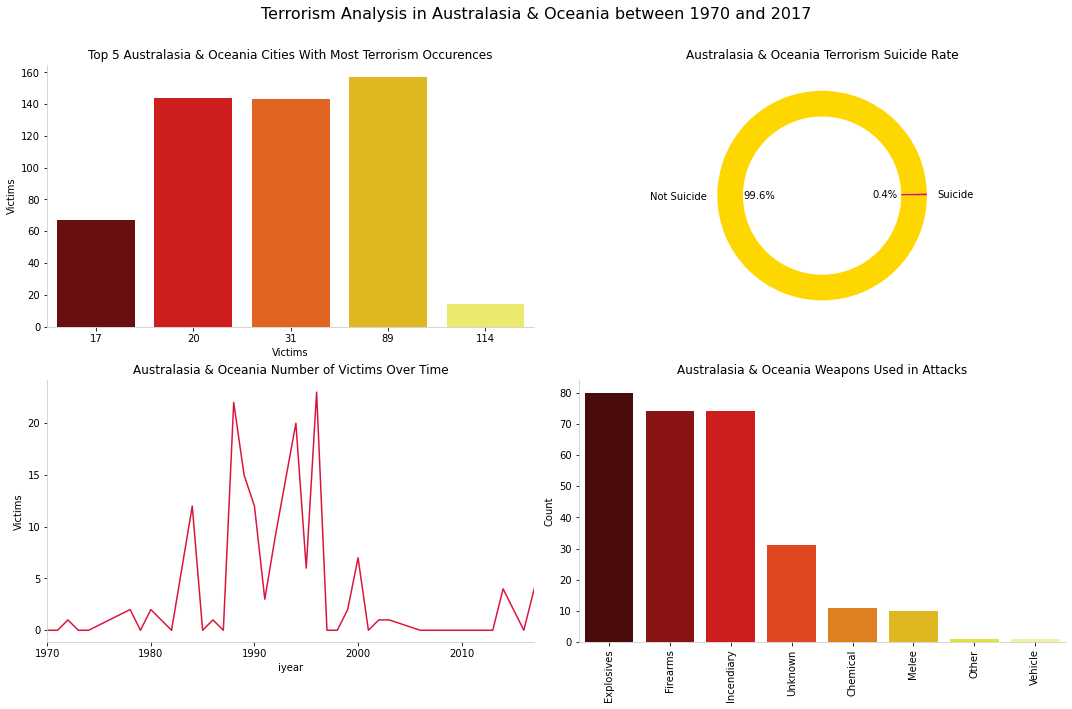

In [ ]:
region_analysis(region_name='Australasia & Oceania', data=terr_data, palette='hot', 
                 colors_plot2=['crimson', 'gold'], color_lineplot='crimson')

<br><br><h1>THANK YOU !!</h1><br><br>